In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
mpg.describe().applymap(lambda x: round(x))

/tmp/ipykernel_26532/4061260827.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mpg.describe().applymap(lambda x: round(x))


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


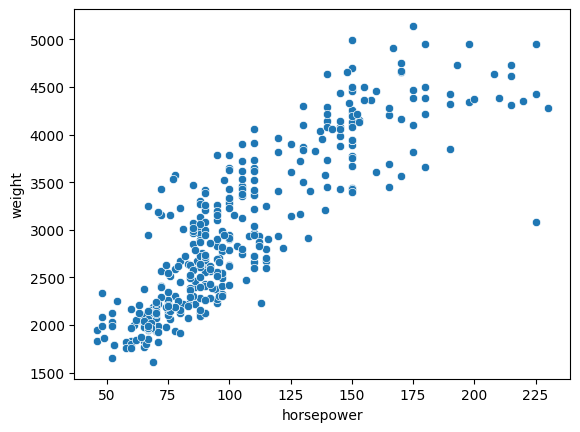

In [3]:
sns.scatterplot(x='horsepower', y='weight', data=mpg);

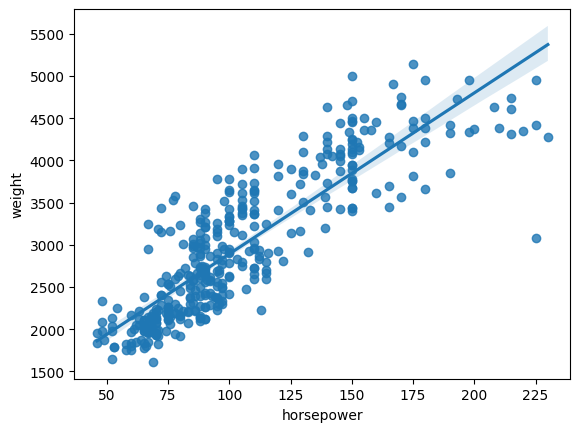

In [4]:
sns.regplot(x='horsepower', y='weight', data=mpg);

In [5]:
round(mpg.corr(numeric_only=True),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


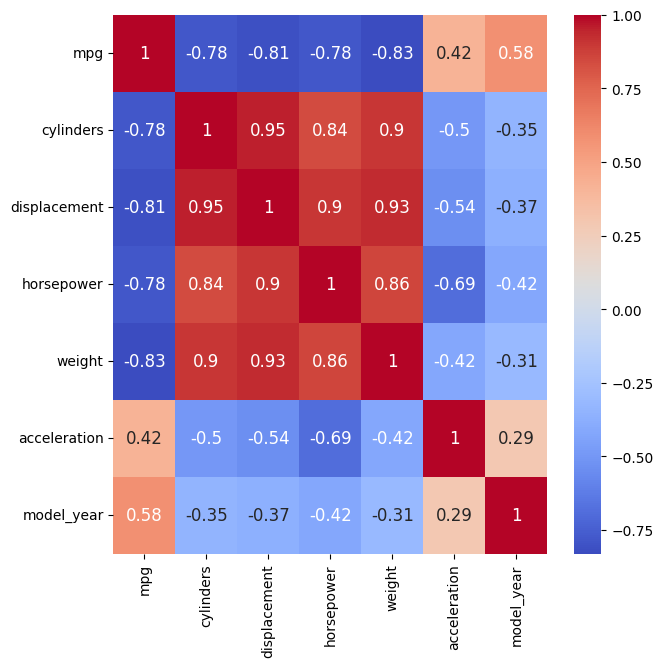

In [6]:
plt.figure(figsize = (7,7))
sns.heatmap(round(mpg.corr(numeric_only=True),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

In [27]:
print('R-Squared = ', (mpg.corr(numeric_only=True)['weight']['horsepower'])**2)

R-Squared =  0.7474254996898221


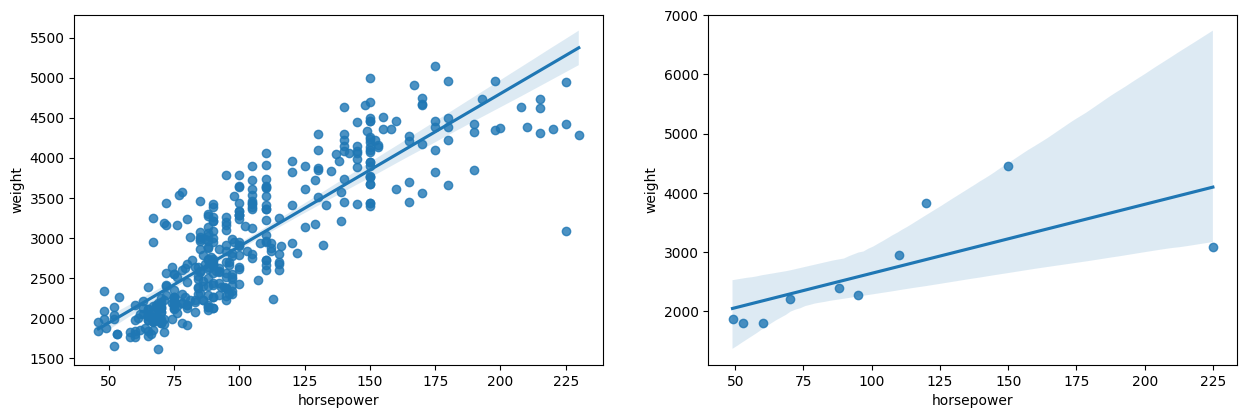

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=mpg, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=mpg.sample(10, random_state=6), ci=95);

In [9]:
import statsmodels.api as sm
Y = mpg['weight']
X = mpg['horsepower']
model = sm.OLS(Y, X).fit()
model.predict(X)

0      3559.155868
1      4517.390141
2      4106.718310
3      4106.718310
4      3832.937089
          ...     
393    2354.518497
394    1423.662347
395    2299.762253
396    2162.871643
397    2245.006009
Length: 392, dtype: float64

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 weight   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.221e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                   5.37e-297
Time:                        09:01:39   Log-Likelihood:                         -3026.3
No. Observations:                 392   AIC:                                      6055.
Df Residuals:                     391   BIC:                                      6059.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    27.3781      0.248    110.515      0.000      26.891      27.865
==============================================================================
Omnibus:                      101.879   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.753
Skew:                          -1.106   Prob(JB):                     4.67e-84
Kurtosis:                       7.313   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula='weight ~ horsepower', data=mpg)

# Train the model to find the best line
model = model.fit()
model.params

Intercept     984.500327
horsepower     19.078162
dtype: float64

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.36e-118
Time:                        10:09:35   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.000     861.593    1107.408
horsepower    19.0782      0.562     33.972      0.000      17.974      20.182
==============================================================================
Omnibus:                       11.785   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.895
Skew:                           0.109   Prob(JB):                     1.76e-05
Kurtosis:                       4.137   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.predict(X)

0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64

In [32]:
X[0] * 19.0782 + 984.5003

3464.6663

In [33]:
model2 = smf.ols(formula='weight ~ horsepower + cylinders', data=mpg).fit()
model2.rsquared

0.8458154043882244

In [34]:
model2.params

Intercept     528.876711
horsepower      8.231070
cylinders     290.356425
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.19e-158
Time:                        10:10:29   Log-Likelihood:                -2833.1
No. Observations:                 392   AIC:                             5672.
Df Residuals:                     389   BIC:                             5684.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.8767     56.816      9.309      0.000     417.171     640.582
horsepower     8.2311      0.817     10.078      0.000       6.625       9.837
cylinders    290.3564     18.429     15.755      0.000     254.124     326.589
==============================================================================
Omnibus:                       11.977   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               23.325
Skew:                           0.076   Prob(JB):                     8.61e-06
Kurtosis:                       4.185   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [17]:
model3 = smf.ols(formula='weight ~ C(origin)', data=mpg).fit()
model3.params

Intercept             2433.470588
C(origin)[T.japan]    -212.242740
C(origin)[T.usa]       939.019208
dtype: float64

In [18]:
predicted_weights = model.predict(mpg['horsepower'])
predicted_weights

0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64